In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.integrate as si
import numpy as np
from scipy.signal import find_peaks
import time
from datetime import datetime
from matplotlib import collections as matcoll
from pylab import rcParams

In [2]:
sns.set()
rcParams['figure.figsize'] = 10, 5

In [3]:
event = pd.read_csv('OneDrive/Desktop/mi note4/BIKE 02Jan,2020-01-07-28 PM/Testing Data/AllDetails.csv')
event.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.702408,7.555344,6.569626,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650200
1,0.733521,7.574493,6.660614,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650207
2,0.690430,7.545761,6.624695,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650211
3,0.616211,7.579285,6.610336,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650219
4,0.621002,7.562515,6.679764,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650221


In [4]:
len(event)

15940

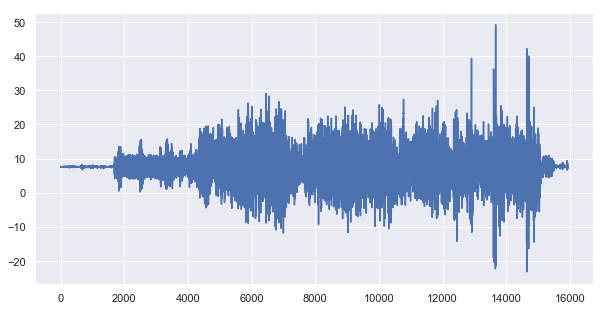

In [5]:
plt.plot(event.y)

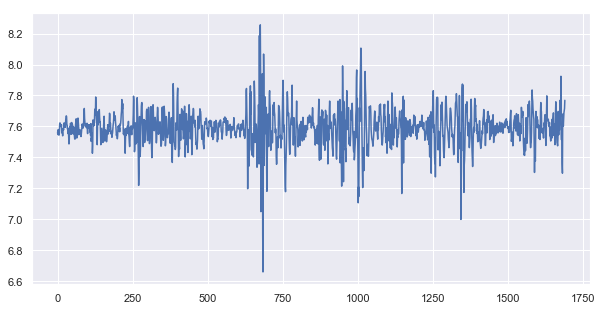

In [6]:
plt.plot(event.y[0:1690])

In [7]:
# noise=0
# for i in event.y[0:1690]:
#     noise += i
# av_noise = noise/len(event.y[0:1690])
# av_noise

In [8]:
pos_noise=0
c=1
for i in event.y[0:1690]:
    if(i>0):
        c+=1
        pos_noise += i
av_pos_noise = pos_noise/c
av_pos_noise

7.585189725665275

In [9]:
neg_noise=0
c=1
for i in event.y[0:1690]:
    if(i<0):
        c+=1
        neg_noise += i
av_neg_noise = neg_noise/c
av_neg_noise

0.0

In [10]:
shift = (av_pos_noise+av_neg_noise)/2
shift

3.7925948628326376

## normaliztion

In [11]:
for i,j in zip(event.y, range(len(event.y))):
    if(av_neg_noise != 0):
        event.loc[j, 'y'] = i - shift
    else:
        event.loc[j, 'y'] = i - av_pos_noise
event

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.702408,-0.029846,6.569626,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650200
1,0.733521,-0.010696,6.660614,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650207
2,0.690430,-0.039429,6.624695,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650211
3,0.616211,-0.005905,6.610336,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650219
4,0.621002,-0.022674,6.679764,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650221
5,0.659302,-0.041824,6.677368,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650223
6,0.676071,-0.029846,6.574417,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650228
7,0.664093,0.029999,6.646240,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650233
8,0.656906,0.037186,6.600754,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650238
9,0.632965,0.032394,6.564835,23.543695,87.289226,0.0,43.341824,8115,13:07:30 PM,1577950650243


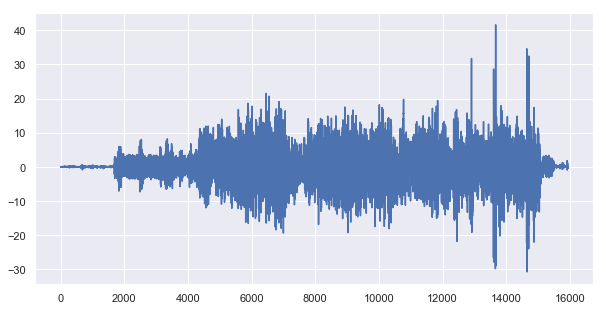

In [12]:
plt.plot(event.y)

In [13]:
def kalmanFilter(event):
    event = np.array(event)
    size = len(event)
    n_iter = size
   
    Q = 1e-5     # process variance
   
    xhat=np.zeros(size)      # a posteri estimate of x
    P=np.zeros(size)         # a posteri error estimate
    xhatminus=np.zeros(size) # a priori estimate of x
    Pminus=np.zeros(size)    # a priori error estimate
    K=np.zeros(size)         # gain or blending factor
   
    R = 0.1**2 # estimate of measurement variance, change to see effect

    # intial guesses
    xhat[0] = 0.0
    P[0] = 1.0
   
    for k in range(1,n_iter):
        # time update
        xhatminus[k] = xhat[k-1]
        Pminus[k] = P[k-1]+Q
   
        # measurement update
        K[k] = Pminus[k]/( Pminus[k]+R )
        xhat[k] = xhatminus[k]+K[k]*(event[k]-xhatminus[k])
        P[k] = (1-K[k])*Pminus[k]
   
    return xhat

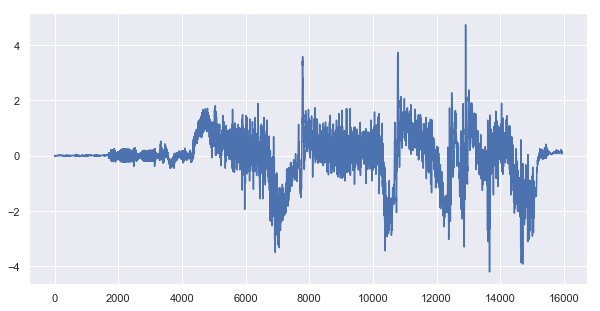

In [14]:
# plt.plot(event['y'])
plt.plot(kalmanFilter(event.y))

In [15]:
kal_data = kalmanFilter(event.y)
kal_data

array([ 0.        , -0.01059042, -0.02494512, ...,  0.10552202,
        0.09109832,  0.08554503])

In [16]:
# for i,j in zip(kal_data, range(len(kal_data))):
#     if(i<7.55):
#         kal_data[j] = 7.55
#     if(i>30):
#         kal_data[j] = 30

## concatenate time 

In [17]:
date_time = []
for index in event.index:
    p = pd.Timestamp(event.timestamp.loc[index],unit='ms',tz='Asia/Kolkata')
    date_time.append(p.time())
date_time[3]

datetime.time(13, 7, 30, 219000)

In [18]:
pd.Timestamp(1577950650219, unit='ms', tz='Asia/Kolkata').time()

datetime.time(13, 7, 30, 219000)

In [19]:
time = []
for i in range(len(date_time)):
    a = ((date_time[i].hour*3600 + date_time[i].minute*60 + date_time[i].second) + date_time[i].microsecond*10**(-6))
    time.append(a)
# time

In [20]:
ar = np.array(time)
event['time'] = ar
event.head()

,x,y,z,latitude,longitude,speed,sound,light,time,timestamp
0,0.702408,-0.029846,6.569626,23.543695,87.289226,0.0,43.341824,8115,47250.200,1577950650200
1,0.733521,-0.010696,6.660614,23.543695,87.289226,0.0,43.341824,8115,47250.207,1577950650207
2,0.690430,-0.039429,6.624695,23.543695,87.289226,0.0,43.341824,8115,47250.211,1577950650211
3,0.616211,-0.005905,6.610336,23.543695,87.289226,0.0,43.341824,8115,47250.219,1577950650219
4,0.621002,-0.022674,6.679764,23.543695,87.289226,0.0,43.341824,8115,47250.221,1577950650221


## velocity

In [21]:
vel = [0]
for t,t_next,a,a_next,v in zip((event.time[0:]),(event.time[1:]),(kal_data[0:]),(kal_data[1:]),(vel)):
#     if(a<a_next):
    if(a==0):
        v=v
    else:
        v = v + (t_next-t)*((a+a_next)/2)
#     elif(a>a_next):
#         v = v - (t_next-t)*((a_next+a)/2)
#     else:
#         v=v
    vel.append(v)
vel

[0,
 0,
 -7.107107612733173e-05,
 -0.00024528705774217976,
 -0.0002835222340278383,
 -0.0003272322010355133,
 -0.0004500695712673944,
 -0.00055543821901628,
 -0.0006236814039023946,
 -0.0006626010985140602,
 -0.0006853789529938082,
 -0.0006928732187299908,
 -0.0006918665677923321,
 -0.0006761833541636651,
 -0.0006679895482742874,
 -0.0006638925367943477,
 -0.000664853390597901,
 -0.000672187778423815,
 -0.0006930960121787089,
 -0.0007105535695322545,
 -0.0007412145836903001,
 -0.0007567576725846816,
 -0.0007678845223487212,
 -0.0007731010630332095,
 -0.0007735493160992711,
 -0.0007685997145242451,
 -0.0007542396943540935,
 -0.0007480966343918735,
 -0.0007200764940170075,
 -0.0006768280042108674,
 -0.0006065634592832983,
 -0.0005262230756805588,
 -0.00048474038836578625,
 -0.00038909531282702134,
 -0.000323721518352008,
 -0.0002758788284986197,
 -0.0002008914429646729,
 -0.0001733763206749491,
 -0.00014339751445227025,
 -0.0001146861737626461,
 -0.00011059548148936178,
 -0.0001071782900

In [22]:
# vel = [0]
# for t,t_next,a,a_next,v in zip((event.time[0:]),(event.time[1:]),(kal_data[0:]),(kal_data[1:]),(vel)):
#     if(a>7.589678003609456):
#         v = v + (t_next-t)*(a/2)
#     elif(a<7.589678003609456):
#         v = v - (t_next-t)*(a/2)
#     else:
#         v=v
#     vel.append(v)
# vel

In [23]:
for i,j in zip(vel, range(len(vel))):
    vel[j] = i*3.6
vel

[0.0,
 0.0,
 -0.0002558558740583942,
 -0.0008830334078718472,
 -0.001020680042500218,
 -0.001178035923727848,
 -0.00162025045656262,
 -0.0019995775884586084,
 -0.0022452530540486206,
 -0.0023853639546506165,
 -0.0024673642307777095,
 -0.002494343587427967,
 -0.002490719644052396,
 -0.0024342600749891943,
 -0.002404762373787435,
 -0.0023900131324596516,
 -0.002393472206152444,
 -0.002419876002325734,
 -0.002495145643843352,
 -0.0025579928503161164,
 -0.0026683725012850803,
 -0.002724327621304854,
 -0.0027643842804553963,
 -0.0027831638269195545,
 -0.002784777537957376,
 -0.0027669589722872827,
 -0.0027152628996747366,
 -0.0026931478838107445,
 -0.002592275378461227,
 -0.0024365808151591228,
 -0.002183628453419874,
 -0.0018944030724500115,
 -0.0017450653981168306,
 -0.0014007431261772768,
 -0.0011653974660672287,
 -0.000993163782595031,
 -0.0007232091946728224,
 -0.0006241547544298167,
 -0.0005162310520281729,
 -0.00041287022554552596,
 -0.0003981437333617024,
 -0.00038584184414432665,
 

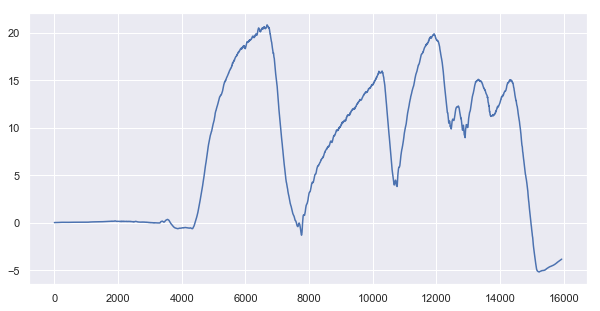

In [24]:
plt.plot(vel)

In [25]:
sum=0
for i in vel:
    sum += i
av_vel = sum/(len(vel)-2)
av_vel

7.489345129126397

## velocity with peaks

In [26]:
peaks, _= find_peaks(event.y, height=7.55)
y_peaks = event.y[peaks]
time_peaks = event.time[peaks]

In [27]:
vel = [0]
for t,t_next,a,a_next,v in zip((time_peaks[0:len(time_peaks)-1]),(time_peaks[1:len(time_peaks)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a<a_next):
        v = v + (t_next-t)*((a_next+a)/2)*2
    elif(a>a_next):
        v = v - (t_next-t)*((a_next+a)/2)*2
    else:
        v=v
    vel.append(v)
vel

[0,
 2.469619035129201,
 -60.25908315954861,
 -57.787639033913756,
 -139.65332122509162,
 -138.99203644313042,
 -138.24708890627184,
 -137.47120678715228,
 -138.22940781643138,
 -138.9157113555606,
 -141.41218392977288,
 -140.71868351001964,
 -141.43524523687788,
 -140.23840436806816,
 -140.80940516810173,
 -140.29139110166176,
 -140.93550140403042,
 -141.39048988336762,
 -140.7151113400209,
 -141.19851870686833,
 -141.8066894426214,
 -141.3048362561808,
 -140.67295071681343,
 -140.07233684037666,
 -140.81989576949928,
 -141.39627127517412,
 -140.89369985873353,
 -140.20580479960446,
 -140.78544531604206,
 -138.08005526903588,
 -138.7188323109973,
 -140.51009537724727,
 -139.85119092100663,
 -140.40124179406288,
 -139.36348968118298,
 -138.13884499299132,
 -137.4498464154502,
 -138.73701428115982,
 -138.21914394471983,
 -139.40453265180665,
 -140.93330979614822,
 -140.41895886409503,
 -139.20511440041642,
 -142.09588792822763,
 -144.7472848352729,
 -143.3345255436505,
 -141.59958815655

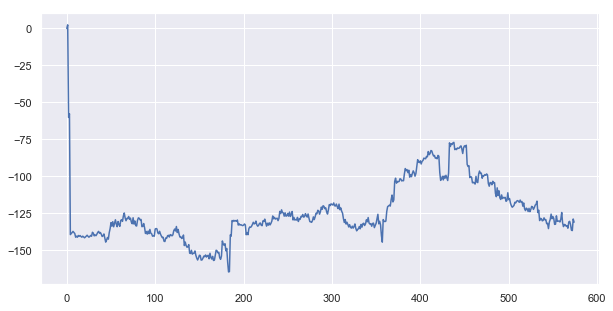

In [28]:
plt.plot(vel)

In [29]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel*3.6

-448.3298526137058

## window of 100

In [30]:
max_y = []
min_y = []
max_time = []
min_time = []
max_loc = []
min_loc = []
last_check = 0

total = []
for i in range(1,80):
    total.append(i*100)

for index,i in zip(total,range(80)):
    loc1 = np.where(event.y.iloc[last_check:index-1] == np.amax(event.y.iloc[last_check:index-1]))
    max_loc.append(loc1[0][0]+100*i)
    max_y.append(event.y.iloc[loc1[0][0]+100*i])
    max_time.append(event.time.iloc[loc1[0][0]+100*i])
    
    loc2 = np.where(event.y.iloc[last_check:index-1] == np.amin(event.y.iloc[last_check:index-1]))
    min_loc.append(loc2[0][0]+100*i)
    min_y.append(event.y.iloc[loc2[0][0]+100*i])
    min_time.append(event.time.iloc[loc2[0][0]+100*i])
    last_check = index
# len(max_y)
# min_y
# max_time
# max_loc
# min_time

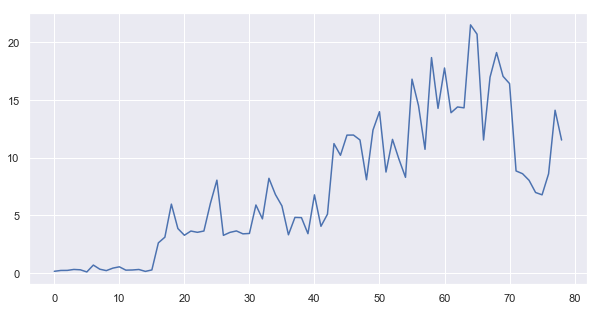

In [31]:
plt.plot(max_y)

(0, 50)

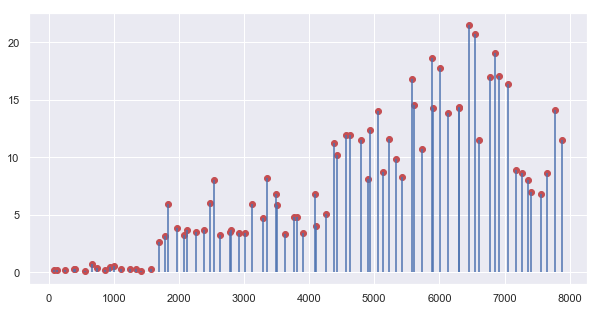

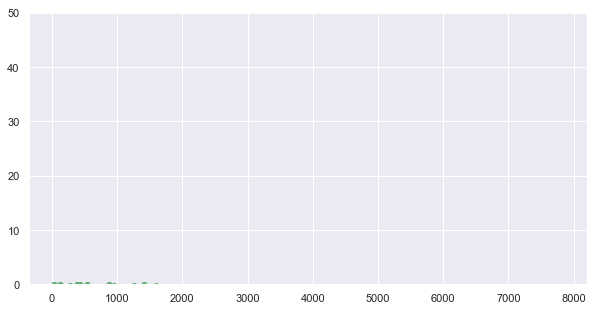

In [32]:
max_lines = []
for i in range(len(max_loc)):
    max_pair=[(max_loc[i],0), (max_loc[i], max_y[i])]
    max_lines.append(max_pair)
    
max_linecoll = matcoll.LineCollection(max_lines)
fig, max_ax = plt.subplots()
max_ax.add_collection(max_linecoll)
plt.scatter(max_loc,max_y,marker='o',color='r')

min_lines = []
for i in range(len(min_loc)):
    min_pair=[(min_loc[i],0), (min_loc[i], min_y[i])]
    min_lines.append(min_pair)

min_linecoll = matcoll.LineCollection(min_lines)
fig, min_ax = plt.subplots()
min_ax.add_collection(min_linecoll)
plt.scatter(min_loc,min_y,marker='o',color='g')
plt.ylim(0,50)

In [33]:
# max_lines = []
# for i in range(len(max_loc)):
#     max_pair=[(max_loc[i],0), (max_loc[i], max_y[i])]
#     max_lines.append(max_pair)

# max_linecoll = matcoll.LineCollection(max_lines)
# fig, max_ax = plt.subplots()
# max_ax.add_collection(max_linecoll)

# plt.scatter(max_loc,max_y,marker='o',color='r')

In [34]:
# min_lines = []
# for i in range(len(min_loc)):
#     min_pair=[(min_loc[i],0), (min_loc[i], min_y[i])]
#     min_lines.append(min_pair)

# min_linecoll = matcoll.LineCollection(min_lines)
# fig, min_ax = plt.subplots()
# min_ax.add_collection(min_linecoll)

# plt.scatter(min_loc,min_y,marker='o',color='b')
# plt.ylim(0,50)

In [35]:
vel = [0]
for t_max,t_min,a_max,a_min,v in zip((max_time[0:len(max_time)]),(min_time[0:len(min_time)]),(max_y[0:len(max_y)]),(min_y[0:len(min_y)]),(vel)):
    if(t_min<t_max):
        v = v + (t_max-t_min)*((a_max+a_min)/2)
    elif(t_min>t_max):
        v = v - (t_min-t_max)*((a_max+a_min)/2)
    else:
        v=v
    vel.append(v)
vel

[0,
 0.004064521326946457,
 0.005319608915362969,
 0.01210790932281099,
 0.012647728937810916,
 0.007660463171771509,
 0.00706638883796307,
 0.012955008718834005,
 0.014867543745138862,
 0.01494576062744696,
 0.015198334742458028,
 0.0161991143848405,
 0.032074698696403094,
 0.0332450890948045,
 0.029206791551563485,
 0.02908851104261881,
 0.029755622069244377,
 0.04049168313572432,
 0.030260814372678288,
 0.01644330695808565,
 -0.3393712234525174,
 -0.34092083587725597,
 -0.3439537869875356,
 -0.34312235923531126,
 -0.3394271508958931,
 -0.258560484619198,
 -0.229482040752163,
 -0.2315210114605617,
 -0.14954478225170542,
 -0.14035234752086204,
 -0.14462102085687176,
 -0.08485221036029705,
 -0.08313306726149566,
 -0.09799728764277546,
 0.0351449948731587,
 0.16549453981015275,
 0.18002077421893253,
 0.17916055638051812,
 0.1299853431386729,
 0.11702455466744778,
 0.04111486531963433,
 0.11705679430293646,
 0.12495611481497751,
 0.1498004856236513,
 0.16627375000887176,
 -0.001990022327

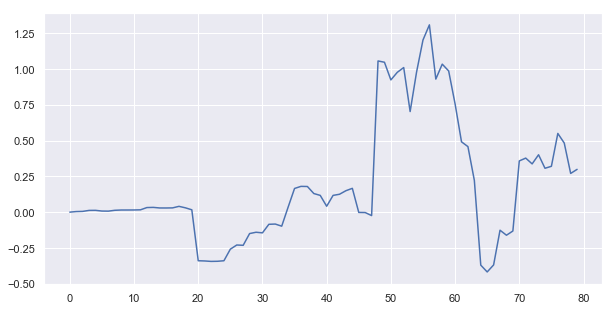

In [36]:
plt.plot(vel)

In [37]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel*3.6

0.6669199651037285

## max and min in window of 10

In [38]:
max_y = []
max_time = []
min_y = []
min_time = []
max_loc = []
min_loc = []

last_check = 0
total = []
for i in range(1,841):
    total.append(i*10)

for index,i in zip(total,range(841)):
    loc1 = np.where(event.y[last_check:index-1] == np.amax(event.y[last_check:index-1]))
    max_loc.append(loc1[0][0]+10*i)
    max_y.append(event.y.iloc[loc1[0][0]+10*i])
    max_time.append(time[loc1[0][0]+10*i])
    
    loc2 = np.where(event.y[last_check:index-1] == np.amin(event.y[last_check:index-1]))
    min_loc.append(loc2[0][0]+10*i)
    min_y.append(event.y.iloc[loc2[0][0]+10*i])
    min_time.append(time[loc2[0][0]+10*i])
    last_check = index
max_y

[0.03718577433472525,
 0.025207574334724647,
 0.0683136743347248,
 0.0778809743347244,
 0.03958127433472569,
 0.02282727433472509,
 0.0683136743347248,
 0.015640274334725035,
 0.111404274334725,
 0.06591827433472464,
 0.025207574334724647,
 0.05633557433472447,
 0.20477327433472503,
 0.10900887433472395,
 0.07310497433472474,
 0.08027657433472513,
 0.025207574334724647,
 0.09944157433472434,
 0.10900887433472395,
 0.08267227433472435,
 0.02999887433472459,
 0.1880188743347242,
 -0.001129025665274952,
 0.04676827433472486,
 0.01803597433472426,
 0.20956427433472413,
 0.19999727433472447,
 0.0778809743347244,
 0.16886927433472465,
 0.12577827433472422,
 0.13774127433472483,
 0.15449527433472543,
 0.07310497433472474,
 0.13774127433472483,
 0.13055427433472477,
 0.144928274334724,
 0.0778809743347244,
 0.106613274334725,
 0.2909699743347254,
 0.16407787433472443,
 0.26223767433472567,
 0.12815867433472494,
 0.144928274334724,
 0.15449527433472543,
 0.08027657433472513,
 0.1305542743347247

In [39]:
len(max_y)

840

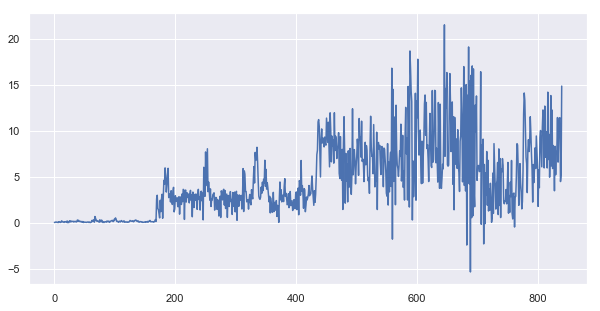

In [40]:
plt.plot(max_y)

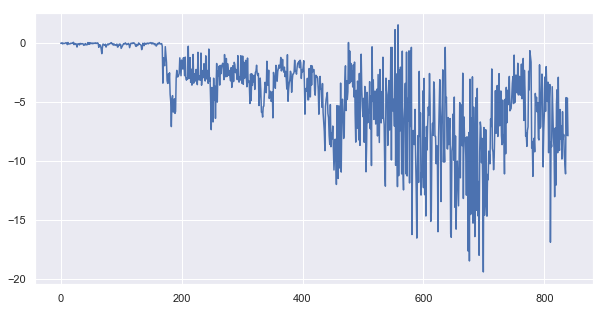

In [41]:
plt.plot(min_y)

## velocity calculation

In [42]:
vel = [0]
for t_max,t_min,a_max,a_min,v in zip((max_time[0:len(max_time)]),(min_time[0:len(min_time)]),(max_y[0:len(max_y)]),(min_y[0:len(min_y)]),(vel)):
    if(t_max>t_min):
        v = v + (t_max-t_min)*(a_max-7.55)
    else:
        v = v - (t_min-t_max)*(a_min-7.55)
    vel.append(v)
vel

[0,
 -0.11269221338060609,
 0.160785952743786,
 -0.1309998139349497,
 0.17497173509834002,
 0.09235712912651393,
 0.39708355815977653,
 0.23996814531601535,
 0.5440244143492632,
 0.24648058537028034,
 0.4652549070316988,
 0.4351557373229057,
 0.34523176419660245,
 0.12487496243519519,
 0.05790604231763451,
 0.2186414015058154,
 0.0617772095620619,
 -0.11881780863594668,
 0.07838276187152549,
 -0.18949291865285756,
 -0.037608524108609126,
 -0.32336856688739135,
 -0.4706081894306935,
 -0.5536706087024628,
 -0.485236524529871,
 -0.6660036611826647,
 -0.5428105935469226,
 -0.6971606507905995,
 -0.8092424361712293,
 -0.6329234465728959,
 -0.8853469852429223,
 -0.7706435868623943,
 -0.9333446908063676,
 -0.8191082109258214,
 -0.9228798331062763,
 -1.0564298561414753,
 -1.1601008603219098,
 -1.2422941695937895,
 -1.0894042151049572,
 -1.198289665485711,
 -1.427253251347371,
 -1.3267544214213722,
 -1.445503882656209,
 -1.3759062101391755,
 -1.5164207999285375,
 -1.4315149203570023,
 -1.2354970

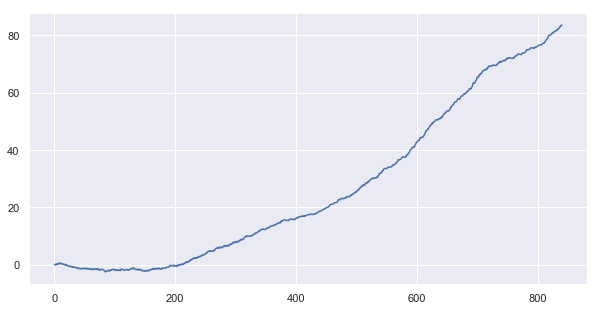

In [43]:
plt.plot(vel)
# plt.ylim(-5,150)

In [44]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel*3.6

96.00787431244905

In [45]:
dis = [0]
for t_pre,t_next,a,a_next,x,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(dis),(vel)):
    if(a>a_next):
        x = x + v*(t_next-t_pre) + (1/2)*(a-7.55)*(t_next-t_pre)**2
    else:
        x = x + v*(t_next-t_pre) - (1/2)*(a-7.55)*(t_next-t_pre)**2
    dis.append(x)
dis

NameError: name 'time_peak' is not defined

In [ ]:
sum=0
for i in dis:
    sum += i
av_dis = sum/len(dis)
av_dis

## window accelaration

In [ ]:
last_check = 0
data_frames = []

nums = []
for i in range(1, 16):
    nums.append(i*100)

for index in nums:
    data_frames.append(event.loc[last_check:index-1])
    last_check = index

## first test case

In [ ]:
plt.plot(event.y[1500:2000])
plt.ylim(0,50)

In [ ]:
len(event)

In [ ]:
y = np.array(data_frames[14].y[0:150])
t = np.array(time[14000:14150])
peaks, _= find_peaks(y, height=7.55)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

In [ ]:
len(peaks)

In [ ]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-7.55)
    else:
        v = v - (t_next-t_pre)*(a-7.55)
    vel.append(v)
vel

In [ ]:
plt.plot(peaks,vel)
# plt.ylim(0,60)

In [ ]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)*3.6
av_vel

In [ ]:
dis = [0]
for t_pre,t_next,a,a_next,x,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(dis),(vel)):
    if(a>a_next):
        x = x + v*(t_next-t_pre) + (1/2)*(a-7.55)*(t_next-t_pre)**2
    else:
        x = x + v*(t_next-t_pre) - (1/2)*(a-7.55)*(t_next-t_pre)**2
    dis.append(x)
dis

In [ ]:
sum=0
for i in dis:
    sum += i
av_dis = sum/len(dis)
av_dis

In [ ]:
(time[14150] - time[14000])

In [ ]:
av_dis/av_vel

## Another test case

In [ ]:
plt.plot(event.y[5000:8500])
plt.ylim(-50,50)

In [ ]:
y = np.array(event.y[5000:8500])  
t = np.array(time[5000:8500])
peaks, _= find_peaks(y, height=7.55)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

In [ ]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
#     if(a>a_next):
    v = v + (t_next-t_pre)*(a-a_next)
#     else:
#         v = v - (t_next-t_pre)*(a-7.55)
    vel.append(v)
vel

In [ ]:
plt.plot(peaks,vel)

In [ ]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)*3.6
av_vel

## Another test case

In [ ]:
plt.plot(data_frames[13].y[600:800])
plt.ylim(-50,50)

In [ ]:
y = np.array(data_frames[13].y[600:800])  
t = np.array(time[13600:13800])
peaks, _= find_peaks(y, height=7.55)

In [ ]:
plt.plot(y)
plt.plot(peaks, y[peaks], "x")

In [ ]:
y_peaks = y[peaks]
time_peak = t[peaks]
y_peaks,time_peak

In [ ]:
vel = [0]
for t_pre,t_next,a,a_next,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(vel)):
    if(a>a_next):
        v = v + (t_next-t_pre)*(a-7.55)
    else:
        v = v - (t_next-t_pre)*(a-7.55)
    vel.append(v)
vel

In [ ]:
plt.plot(peaks,vel)
# plt.ylim(0,150)

In [ ]:
sum=0
for i in vel:
    sum += i
av_vel = sum/len(vel)
av_vel*3.6

In [ ]:
dis = [0]
for t_pre,t_next,a,a_next,x,v in zip((time_peak[0:len(time_peak)-1]),(time_peak[1:len(time_peak)]),(y_peaks[0:len(y_peaks)-1]),(y_peaks[1:len(y_peaks)]),(dis),(vel)):
    if(a>a_next):
        x = x + v*(t_next-t_pre) + (1/2)*(a-6.35)*(t_next-t_pre)**2
    else:
        x = x + v*(t_next-t_pre) - (1/2)*(a-6.35)*(t_next-t_pre)**2
    dis.append(x)
dis

In [ ]:
sum=0
for i in dis:
    sum += i
av_dis = sum/len(dis)
av_dis

In [ ]:
(time_peak[34] - time_peak[0])*av_vel

## GPS

In [ ]:
R = 6371*10**3
lat1 = math.radians(event.latitude[8000])
lon1 = math.radians(event.longitude[8000])

lat2 = math.radians(event.latitude[8000])
lon2= math.radians(event.longitude[8150])

change_lat = math.radians(event.latitude[8150] - event.longitude[8000])
change_lon = math.radians(event.longitude[8150] - event.longitude[8000])

t_s1 = time[8000]
t_s2 = time[8150]
change_t_s = (t_s2-t_s1)

In [ ]:
change_t_s

In [ ]:
a = math.sin(change_lat / 2.0) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(change_lon / 2.0) ** 2
a

In [ ]:
c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
c

In [ ]:
dis = R * c
dis

In [ ]:
vel = (dis / change_t_s)
vel